In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.layers import LabelSmoothingCrossEntropy

In [3]:
folder = Path('D:/ProgProjekte/Python/Results-Exact-Study/Patches')

In [4]:
path = folder/"GroundTruth"

In [5]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      #max_lighting=0.0, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [6]:
def get_data(bs,size):
    data = ImageDataBunch.from_folder(path, train="train", valid="val", size=size, bs=bs, ds_tfms=tfms, num_workers=0)
    return data.normalize()

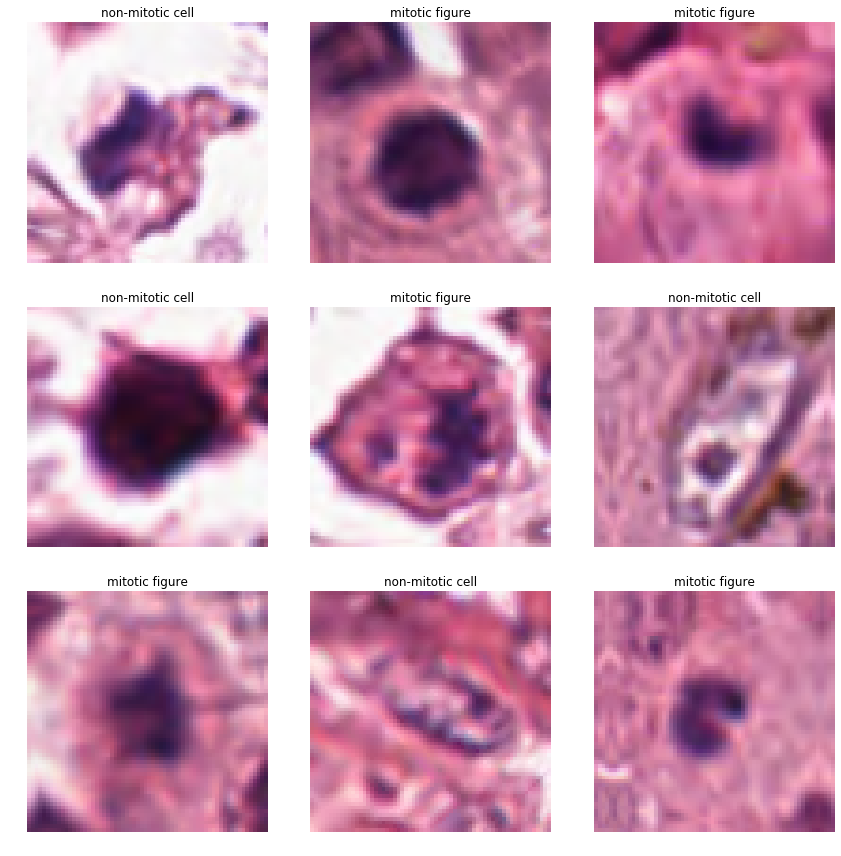

In [7]:
data = get_data(64,64)
fig = data.show_batch(3, return_fig=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


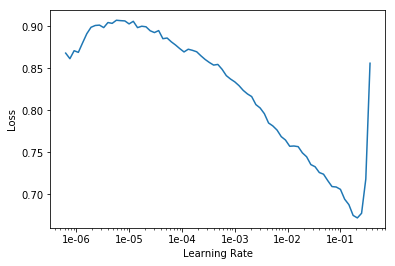

In [8]:
crit = LabelSmoothingCrossEntropy()
learn = cnn_learner(get_data(bs=64, size=64), models.resnet18, metrics=[error_rate, accuracy], callback_fns=[ShowGraph], loss_func=crit)
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.642210,0.711419,0.253093,0.746907,00:13
1,0.593836,0.680864,0.166479,0.833521,00:14
2,0.467260,0.383055,0.165354,0.834646,00:13
3,0.358314,0.314102,0.129359,0.870641,00:13
4,0.282454,0.312368,0.132171,0.867829,00:14


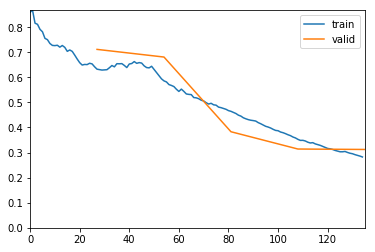

In [9]:
lr = 0.05
learn.fit_one_cycle(5, slice(lr))

In [10]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.216655,0.293666,0.119798,0.880202,00:14
1,0.203106,0.281286,0.115298,0.884702,00:14
2,0.189572,0.263003,0.113048,0.886952,00:14
3,0.169857,0.264344,0.114736,0.885264,00:14
4,0.162147,0.262626,0.111361,0.888639,00:14
5,0.152284,0.275695,0.116423,0.883577,00:14
6,0.140161,0.249740,0.104049,0.895950,00:14
7,0.133352,0.253449,0.107987,0.892013,00:14
8,0.134510,0.244266,0.102362,0.897638,00:11
9,0.138124,0.245865,0.105174,0.894826,00:10


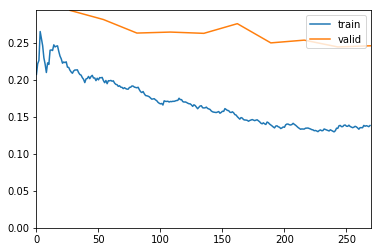

In [11]:
lr = 0.001
learn.fit_one_cycle(10, slice(1e-5, lr/5))